In [1]:
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

In [2]:
data_path = 'data'

In [3]:
data = pd.read_csv(join(data_path, 'test.csv'), parse_dates=['Date_round'])
data.isna().sum(axis=0).Perf_1Y/data.shape[0]

0.02463867580729714

In [4]:
cnt = data.groupby('RanksID').count()['Date_round']

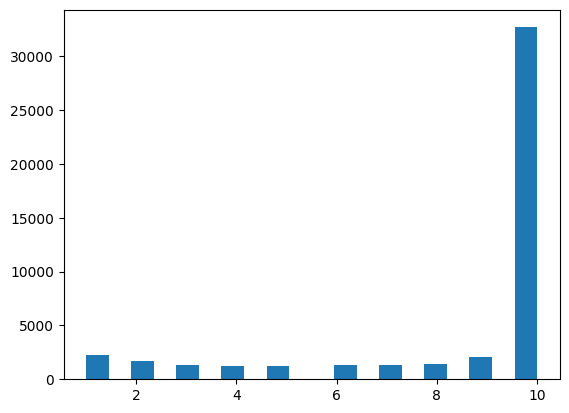

In [5]:
plt.hist(cnt,bins=20);

In [6]:
for th in [0, 1, 2, 5, 10, 20, 30, 40, 50]:
       print(f'th: {th}, '
             f'groups_num: {cnt[cnt > th].shape[0]}, '
             f'ratio: {round(cnt[cnt > th].shape[0]/cnt.shape[0], 4)}')

th: 0, groups_num: 46616, ratio: 1.0
th: 1, groups_num: 44337, ratio: 0.9511
th: 2, groups_num: 42594, ratio: 0.9137
th: 5, groups_num: 38840, ratio: 0.8332
th: 10, groups_num: 0, ratio: 0.0
th: 20, groups_num: 0, ratio: 0.0
th: 30, groups_num: 0, ratio: 0.0
th: 40, groups_num: 0, ratio: 0.0
th: 50, groups_num: 0, ratio: 0.0


In [8]:
data = data[~data.Perf_1Y.isna()]
data.isna().sum(axis=0).Perf_1Y/data.shape[0]

0.0

In [11]:
missing_values = data.isna().sum(axis=0)/data.shape[0]
missing_values.sort_values()

Date_round                                   0.000000
RanksID                                      0.000000
Perf_1Y                                      0.000000
Country_of_Headquarters                      0.034956
C_Price_To_Tangible_Book_Value_Per_Share     0.054580
Price_To_Tangible_Book_Value_Per_Share       0.054580
C_Price_To_Book_Value_Per_Share              0.054804
Price_To_Book_Value_Per_Share                0.054804
gicsSectorName                               0.088644
gicsIndustryGroupName                        0.088644
gicsIndustryName                             0.088644
gicsSubIndustryName                          0.088644
Free_Cash_Flow_net_of_Dividends_per_Share    0.103854
C_Price_to_FCF_net_of_Dividends_per_Share    0.104157
Enterprise_Value_to_Sales                    0.108169
Price_To_Sales_Per_Share                     0.108208
Company_Shares                               0.119814
MCap_group                                   0.119941
Enterprise_Value            

In [12]:
tmp = missing_values.sort_values()
tmp[tmp<0.4].index.to_list()

['Date_round',
 'RanksID',
 'Perf_1Y',
 'Country_of_Headquarters',
 'C_Price_To_Tangible_Book_Value_Per_Share',
 'Price_To_Tangible_Book_Value_Per_Share',
 'C_Price_To_Book_Value_Per_Share',
 'Price_To_Book_Value_Per_Share',
 'gicsSectorName',
 'gicsIndustryGroupName',
 'gicsIndustryName',
 'gicsSubIndustryName',
 'Free_Cash_Flow_net_of_Dividends_per_Share',
 'C_Price_to_FCF_net_of_Dividends_per_Share',
 'Enterprise_Value_to_Sales',
 'Price_To_Sales_Per_Share',
 'Company_Shares',
 'MCap_group',
 'Enterprise_Value',
 'Enterprise_Value_to_EBITDA',
 'Enterprise_Value_to_Operating_Cash_Flow',
 'Price_to_Cash_Flow_per_Share',
 'P_to_E']

In [13]:
valid_columns = ['Date_round', 'RanksID', 'Perf_1Y', 'Country_of_Headquarters',
       'Price_To_Tangible_Book_Value_Per_Share',
       'C_Price_To_Tangible_Book_Value_Per_Share',
       'Price_To_Book_Value_Per_Share', 'C_Price_To_Book_Value_Per_Share',
       'Enterprise_Value_to_Sales', 'Price_To_Sales_Per_Share',
       'Company_Shares', 'MCap_group', 'Enterprise_Value', 'gicsSectorName',
       'gicsIndustryGroupName', 'gicsIndustryName', 'gicsSubIndustryName',
       'Free_Cash_Flow_net_of_Dividends_per_Share',
       'C_Price_to_FCF_net_of_Dividends_per_Share',
       'Enterprise_Value_to_EBITDA', 'Enterprise_Value_to_Operating_Cash_Flow',
       'Price_to_Cash_Flow_per_Share', 'P_to_E']

gics_names = ['gicsSectorName', 'gicsIndustryGroupName','gicsIndustryName','gicsSubIndustryName']

useless_columns = ['MCap_group']

util_columns = ['Date_round', 'RanksID', 'Perf_1Y']
cat_columns = gics_names + ['Country_of_Headquarters']
reg_columns = [el for el in valid_columns if el not in useless_columns + cat_columns + util_columns]

In [14]:
data = data[util_columns + cat_columns + reg_columns]

In [15]:
%%time
missing_ratio = data.groupby('RanksID').agg(lambda x: x.isna().sum(axis=0)/x.shape[0])
missing_ratio

CPU times: user 2min 10s, sys: 1.2 s, total: 2min 11s
Wall time: 2min 26s


,Date_round,Perf_1Y,gicsSectorName,gicsIndustryGroupName,gicsIndustryName,gicsSubIndustryName,Country_of_Headquarters,Price_To_Tangible_Book_Value_Per_Share,C_Price_To_Tangible_Book_Value_Per_Share,Price_To_Book_Value_Per_Share,...,Enterprise_Value_to_Sales,Price_To_Sales_Per_Share,Company_Shares,Enterprise_Value,Free_Cash_Flow_net_of_Dividends_per_Share,C_Price_to_FCF_net_of_Dividends_per_Share,Enterprise_Value_to_EBITDA,Enterprise_Value_to_Operating_Cash_Flow,Price_to_Cash_Flow_per_Share,P_to_E
RanksID,,,,,,,,,,,,,,,,,,,,,
000001.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.7,0.7,0.0
000002.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000004.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.1,0.0,0.0,0.8,0.7,0.7,0.5
000005.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.1,0.0,0.0,0.4,0.4,0.4,0.0
000006.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.4,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYT.L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
ZYXI.O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZZZ.TO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
std = np.std(missing_ratio, axis=0)
full_missing_ratio = missing_ratio[missing_ratio == 1].count()/missing_ratio.shape[0]
pd.DataFrame({'std':std, 'fmr': full_missing_ratio})

,std,fmr
Date_round,0.000000,0.000000
Perf_1Y,0.000000,0.000000
gicsSectorName,0.323349,0.118627
gicsIndustryGroupName,0.323349,0.118627
gicsIndustryName,0.323349,0.118627
gicsSubIndustryName,0.323349,0.118627
Country_of_Headquarters,0.186372,0.036033
Price_To_Tangible_Book_Value_Per_Share,0.265849,0.074555
C_Price_To_Tangible_Book_Value_Per_Share,0.265849,0.074555
Price_To_Book_Value_Per_Share,0.266147,0.074709


In [17]:
bad_groups = set(missing_ratio[missing_ratio.gicsSectorName == 1].index)
mask = data.RanksID.apply(lambda x: x not in bad_groups)
data.loc[~mask, gics_names] = 'unk'

bad_groups = set(missing_ratio[missing_ratio.Country_of_Headquarters == 1].index)
mask = data.RanksID.apply(lambda x: x not in bad_groups)
data.loc[~mask, 'Country_of_Headquarters'] = 'unk'

In [18]:
data.head()

,Date_round,RanksID,Perf_1Y,gicsSectorName,gicsIndustryGroupName,gicsIndustryName,gicsSubIndustryName,Country_of_Headquarters,Price_To_Tangible_Book_Value_Per_Share,C_Price_To_Tangible_Book_Value_Per_Share,...,Enterprise_Value_to_Sales,Price_To_Sales_Per_Share,Company_Shares,Enterprise_Value,Free_Cash_Flow_net_of_Dividends_per_Share,C_Price_to_FCF_net_of_Dividends_per_Share,Enterprise_Value_to_EBITDA,Enterprise_Value_to_Operating_Cash_Flow,Price_to_Cash_Flow_per_Share,P_to_E
0,2018-10-01,000001.SZ,0.403677,Financials,Banks,Banks,Diversified Banks,China,0.878052,0.878052,...,0.933977,1.197598,1.717041e+10,21544.561094,-2.124969,-0.757146,2.110452,8.778881,11.256781,8.201649
1,2018-10-01,000002.SZ,0.077665,Real Estate,Real Estate,Real Estate Management & Development,Real Estate Development,China,2.063162,2.063162,...,1.446793,0.961264,1.103915e+10,58786.200697,0.891089,3.970587,7.345639,7.181804,4.771664,8.988747
2,2018-10-01,000004.SZ,0.184231,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,Biotechnology,China,12.376503,12.376503,...,4.850075,5.061343,8.397668e+07,186.298035,0.015726,147.212974,NaN,51.690039,53.941640,93.222326
3,2018-10-01,000005.SZ,0.092832,Industrials,Capital Goods,Construction & Engineering,Construction & Engineering,China,2.889434,2.889434,...,6.551868,5.177223,1.058537e+09,573.444302,-0.043560,-9.827143,58.339402,53.128253,41.981439,75.520164
4,2018-10-01,000006.SZ,-0.038956,Real Estate,Real Estate,Real Estate Management & Development,Real Estate Development,China,1.340729,1.340729,...,4.380339,3.586666,1.349995e+09,1368.338296,0.026716,31.064816,18.138648,NaN,NaN,7.916557


In [19]:
%%time
t = data.sort_values(['RanksID', 'Date_round'])

CPU times: user 159 ms, sys: 36.2 ms, total: 195 ms
Wall time: 223 ms


In [20]:
%%time
t = t.groupby('RanksID').agg(lambda x: x.interpolate(method='pad', limit_area='inside').tolist())

CPU times: user 3min 38s, sys: 2.66 s, total: 3min 41s
Wall time: 3min 48s


In [21]:
%%time
t = t.apply(pd.Series.explode).reset_index()

CPU times: user 1.26 s, sys: 123 ms, total: 1.39 s
Wall time: 1.41 s


In [23]:
%%time
cols = reg_columns
nan_mask = t[cols].isna()
mean_by_days = t[cols + ['Date_round']].groupby('Date_round').mean()

clear_data = t[cols].copy()
clear_data[nan_mask] = t[cols  + ['Date_round']].apply(lambda x: mean_by_days.loc[x.Date_round], axis=1)[cols]
clear_data = pd.merge(clear_data, t[['Date_round', 'RanksID', 'Perf_1Y'] + cat_columns], left_index=True, right_index=True)

CPU times: user 1min 7s, sys: 1.26 s, total: 1min 8s
Wall time: 1min 9s


In [24]:
clear_data.isna().sum()

Price_To_Tangible_Book_Value_Per_Share       0
C_Price_To_Tangible_Book_Value_Per_Share     0
Price_To_Book_Value_Per_Share                0
C_Price_To_Book_Value_Per_Share              0
Enterprise_Value_to_Sales                    0
Price_To_Sales_Per_Share                     0
Company_Shares                               0
Enterprise_Value                             0
Free_Cash_Flow_net_of_Dividends_per_Share    0
C_Price_to_FCF_net_of_Dividends_per_Share    0
Enterprise_Value_to_EBITDA                   0
Enterprise_Value_to_Operating_Cash_Flow      0
Price_to_Cash_Flow_per_Share                 0
P_to_E                                       0
Date_round                                   0
RanksID                                      0
Perf_1Y                                      0
gicsSectorName                               0
gicsIndustryGroupName                        0
gicsIndustryName                             0
gicsSubIndustryName                          0
Country_of_He

In [24]:
t.isna().sum()

RanksID                                           0
Date_round                                        0
Perf_1Y                                           0
gicsSectorName                               274113
gicsIndustryGroupName                        274113
gicsIndustryName                             274113
gicsSubIndustryName                          274113
Country_of_Headquarters                       58247
Price_To_Tangible_Book_Value_Per_Share       165647
C_Price_To_Tangible_Book_Value_Per_Share     165647
Price_To_Book_Value_Per_Share                165740
C_Price_To_Book_Value_Per_Share              165740
Enterprise_Value_to_Sales                    216962
Price_To_Sales_Per_Share                     216628
Company_Shares                               125413
Enterprise_Value                             138377
Free_Cash_Flow_net_of_Dividends_per_Share    352638
C_Price_to_FCF_net_of_Dividends_per_Share    353015
Enterprise_Value_to_EBITDA                   350858
Enterprise_V

In [25]:
clear_data.to_csv(join(data_path, 'clear_test_data.csv'), index=False)